In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

# 7.2 주요 레이어 정리

## 7.2.1 SimpleRNN 레이어

In [2]:
# 7.1 SimpleRNN 레이어 생성 코드

rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [3]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


<img src="img/img_26.png">

In [6]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="adam",
             loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.3727741 ]
 [0.508041  ]
 [0.6248599 ]
 [0.72224116]
 [0.8015249 ]
 [0.86513114]]


In [8]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=300, verbose=0)
print(model.predict(X))

[[0.3924037 ]
 [0.50213444]
 [0.60718465]
 [0.70687646]
 [0.8010682 ]
 [0.889881  ]]


In [9]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.9734516]]
[[0.2792811]]


## 7.2.2 LSTM 레이어

<img src="img/img_27.png">

In [10]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.10925731]
 [0.         0.78932808]
 [0.         0.76565564]
 [0.         0.70783844]
 [0.         0.0876141 ]
 [0.         0.43374262]
 [1.         0.40204617]
 [0.         0.43743676]
 [0.         0.86606557]
 [0.         0.57491019]
 [0.         0.3081082 ]
 [0.         0.95702729]
 [0.         0.43871728]
 [0.         0.49712629]
 [0.         0.97706252]
 [0.         0.13341592]
 [0.         0.8666612 ]
 [0.         0.30681769]
 [0.         0.8465878 ]
 [0.         0.85901058]
 [0.         0.78495183]
 [0.         0.08658224]
 [0.         0.85333086]
 [0.         0.02466915]
 [0.         0.04127179]
 [0.         0.8587625 ]
 [0.         0.57426167]
 [0.         0.43205358]
 [0.         0.03547664]
 [0.         0.86313926]
 [0.         0.70657588]
 [0.         0.82956965]
 [0.         0.16217168]
 [0.         0.51367229]
 [0.         0.37937166]
 [0.         0.59087087]
 [0.         0.13085819]
 [0.         0.12184037]
 [0.         0.56835127]
 [0.         0.01120651]


<img src="img/img_28.png">

In [12]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의 --> 실질적으로는 위로 많이 쌓지는 않음;;;;
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="adam",
              loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560],Y[:2560],epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 1s 20ms/step - loss: 0.0588 - val_loss: 0.0473
Epoch 2/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0511 - val_loss: 0.0468
Epoch 3/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0515 - val_loss: 0.0490
Epoch 4/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0495 - val_loss: 0.0470
Epoch 5/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0510 - val_loss: 0.0473
Epoch 6/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0496 - val_loss: 0.0470
Epoch 7/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0502 - val_loss: 0.0468
Epoch 8/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0495 - val_loss: 0.0483
Epoch 9/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0502 - val_loss: 0.0468
Epoch 10/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0502 - val_loss: 0.0468

64/64 [==============================] - 1s 18ms/step - loss: 0.0300 - val_loss: 0.0591
Epoch 83/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0302 - val_loss: 0.0549
Epoch 84/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0295 - val_loss: 0.0591
Epoch 85/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0297 - val_loss: 0.0589
Epoch 86/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0289 - val_loss: 0.0556
Epoch 87/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0280 - val_loss: 0.0566
Epoch 88/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0303 - val_loss: 0.0559
Epoch 89/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0285 - val_loss: 0.0546
Epoch 90/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0272 - val_loss: 0.0569
Epoch 91/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0268 - val_loss: 0.0601
Epo

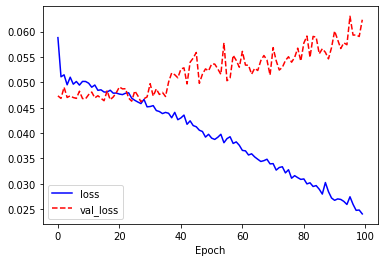

In [14]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])


# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 6ms/step - loss: 0.0621
0.5495745943430808 	 0.02929364 	diff: 0.520280954757705
0.25035874774716044 	 0.46635133 	diff: 0.21599258253314352
0.4944867840626954 	 0.042179517 	diff: 0.45230726661474696
0.13015757454184348 	 0.25854847 	diff: 0.12839089380952065
0.07682973395632361 	 0.48501295 	diff: 0.40818321455670736
correctness: 12.272727272727273 %


In [16]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="adam",
              loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 37ms/step - loss: 0.0573 - val_loss: 0.0468
Epoch 2/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0496 - val_loss: 0.0466
Epoch 3/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0495 - val_loss: 0.0478
Epoch 4/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0494 - val_loss: 0.0467
Epoch 5/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0496 - val_loss: 0.0467
Epoch 6/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0498 - val_loss: 0.0467
Epoch 7/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0494 - val_loss: 0.0476
Epoch 8/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0496 - val_loss: 0.0465
Epoch 9/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0494 - val_loss: 0.0472
Epoch 10/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0494 - val_loss: 0.0465

64/64 [==============================] - 2s 30ms/step - loss: 5.2982e-04 - val_loss: 6.5927e-04
Epoch 81/100
64/64 [==============================] - 2s 29ms/step - loss: 3.5474e-04 - val_loss: 5.5111e-04
Epoch 82/100
64/64 [==============================] - 2s 29ms/step - loss: 5.2626e-04 - val_loss: 3.8648e-04
Epoch 83/100
64/64 [==============================] - 2s 29ms/step - loss: 4.3624e-04 - val_loss: 5.4903e-04
Epoch 84/100
64/64 [==============================] - 2s 29ms/step - loss: 5.2998e-04 - val_loss: 4.5376e-04
Epoch 85/100
64/64 [==============================] - 2s 29ms/step - loss: 4.7528e-04 - val_loss: 3.6981e-04
Epoch 86/100
64/64 [==============================] - 2s 29ms/step - loss: 5.0468e-04 - val_loss: 4.9441e-04
Epoch 87/100
64/64 [==============================] - 2s 29ms/step - loss: 2.7947e-04 - val_loss: 5.7874e-04
Epoch 88/100
64/64 [==============================] - 2s 29ms/step - loss: 3.6551e-04 - val_loss: 2.9901e-04
Epoch 89/100
64/64 [============

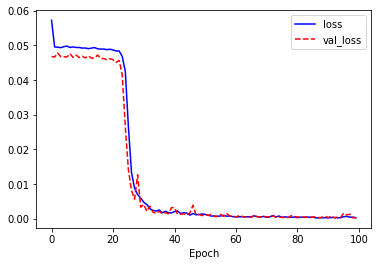

In [18]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 10ms/step - loss: 3.2597e-04
0.5495745943430808 	 0.52473235 	diff: 0.024842243039980172
0.25035874774716044 	 0.24051967 	diff: 0.00983907511494303
0.4944867840626954 	 0.4872463 	diff: 0.007240479312252912
0.13015757454184348 	 0.119367294 	diff: 0.010790280528343271
0.07682973395632361 	 0.07601997 	diff: 0.0008097613935336978
correctness: 95.45454545454545 %


## 7.2.3 GRU 레이어

In [20]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer="adam",
              loss="mse")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0516 - val_loss: 0.0478
Epoch 2/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0502 - val_loss: 0.0478
Epoch 3/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0500 - val_loss: 0.0471
Epoch 4/100
64/64 [==============================] - 2s 29ms/step - loss: 0.0494 - val_loss: 0.0473
Epoch 5/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0496 - val_loss: 0.0467
Epoch 6/100
64/64 [==============================] - 2s 28ms/step - loss: 0.0492 - val_loss: 0.0466
Epoch 7/100
64/64 [==============================] - ETA: 0s - loss: 0.0491- ETA - 2s 27ms/step - loss: 0.0491 - val_loss: 0.0466
Epoch 8/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0493 - val_loss: 0.0465
Epoch 9/100
64/64 [==============================] - 2s 27ms/step - loss: 0.0493 - val_loss: 0.0468
Epoch 10/100
64/64 [==============================] - 2s 29ms/step - l

64/64 [==============================] - 2s 27ms/step - loss: 1.8401e-04 - val_loss: 4.2378e-04
Epoch 79/100
64/64 [==============================] - 2s 27ms/step - loss: 1.8642e-04 - val_loss: 2.3269e-04
Epoch 80/100
64/64 [==============================] - 2s 27ms/step - loss: 1.6635e-04 - val_loss: 2.6675e-04
Epoch 81/100
64/64 [==============================] - 2s 30ms/step - loss: 2.2986e-04 - val_loss: 5.4870e-04
Epoch 82/100
64/64 [==============================] - 2s 27ms/step - loss: 1.7221e-04 - val_loss: 2.2513e-04
Epoch 83/100
64/64 [==============================] - 2s 28ms/step - loss: 1.5158e-04 - val_loss: 2.1244e-04
Epoch 84/100
64/64 [==============================] - 2s 27ms/step - loss: 1.6768e-04 - val_loss: 2.5832e-04
Epoch 85/100
64/64 [==============================] - 2s 27ms/step - loss: 2.1931e-04 - val_loss: 2.1112e-04
Epoch 86/100
64/64 [==============================] - 2s 27ms/step - loss: 1.6743e-04 - val_loss: 1.9541e-04
Epoch 87/100
64/64 [============

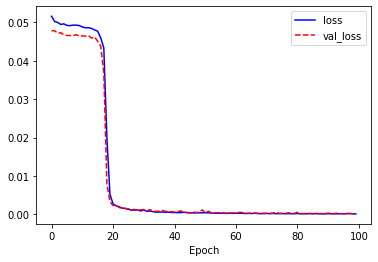

In [22]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 9ms/step - loss: 1.5143e-04
0.5495745943430808 	 0.55037755 	diff: 0.0008029533978555214
0.25035874774716044 	 0.274123 	diff: 0.02376426527240133
0.4944867840626954 	 0.5003807 	diff: 0.005893910803485003
0.13015757454184348 	 0.13625972 	diff: 0.006102145187580038
0.07682973395632361 	 0.086997 	diff: 0.010167268406881341
correctness: 99.54545454545455 %


# 7.3 긍정, 부정 감성 분석

In [24]:
# 7.19 Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 1s 0us/step


In [3]:
# 7.20 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [4]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [5]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


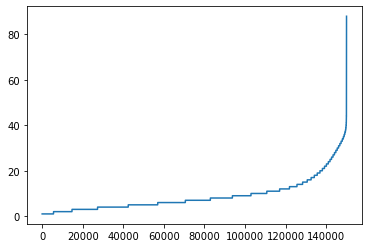

142587


In [6]:
# 7.23 각 문장의 단어 길이 확인 : y축이 문장의 단어 수, X축이 데이터의 수
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [29]:
# 7.24 단어 정제 및 문장 길이 줄임  --> 위의 결과로 25개로 ㅋ컷을 정했으니..다 줄이기..
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [30]:
# 7.25 Tokenizer와 pad_sequences를 사용한 문장 전처리 --> 뒤에 비는 경우에는 padding 처리를 위해서 pad_sequence 사용!!!!
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [31]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [32]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 135s 1ms/sample - loss: 0.4331 - accuracy: 0.7855 - val_loss: 0.3798 - val_accuracy: 0.8223
Epoch 2/5
120000/120000 [==============================] - 133s 1ms/sample - loss: 0.3244 - accuracy: 0.8479 - val_loss: 0.4006 - val_accuracy: 0.8221
Epoch 3/5
120000/120000 [==============================] - 144s 1ms/sample - loss: 0.2719 - accuracy: 0.8702 - val_loss: 0.4126 - val_accuracy: 0.8159
Epoch 4/5
120000/120000 [==============================] - 147s 1ms/sample - loss: 0.2266 - accuracy: 0.8900 - val_loss: 0.4544 - val_accuracy: 0.8140
Epoch 5/5
120000/120000 [==============================] - 132s 1ms/sample - loss: 0.1903 - accuracy: 0.9059 - val_loss: 0.5882 - val_accuracy: 0.8075


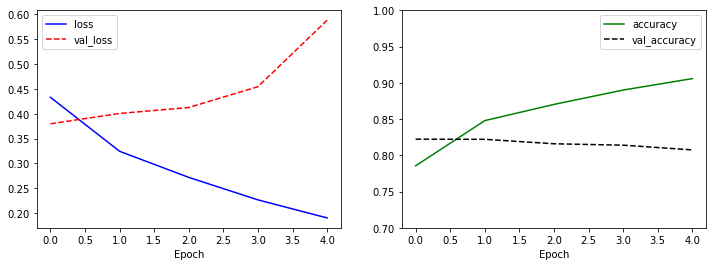

In [34]:
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [35]:
# 7.30 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.5955543177032471, 0.80164]

In [20]:
a = [1,2,3,4,5]

[x for x in a if x not in [3,4,5]]

[1, 2]

In [36]:
# 7.31 임의의 문장 감성 분석 결과 확인 ( 부정0, 긍정1--> 입력 단어들을 늘려가면서 해당하는 감성 분석에 대한 결과가 어떻게 다르게 되는지..)
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.32289687 0.6771031 ]
['재미있을', '줄']
[0.3081396 0.6918604]
['재미있을', '줄', '알았는데']
[0.32964516 0.6703549 ]
['재미있을', '줄', '알았는데', '완전']
[0.3915065 0.6084935]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.3915065 0.6084935]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.45829684 0.54170316]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9914281 0.0085719]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.9936098e-01 6.3901814e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.9936098e-01 6.3901814e-04]
